# The Critics Critique Results Analysis

## 0. import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.options.display.max_rows = 4000

## 1. import Data

In [4]:
scored_texts = pd.read_csv('../data/scored_texts.csv')

In [5]:
scored_texts

,site,url_link,author,game,company,genre,platform,text,score,stars,stars_mean,score_label,score_adj
0,meristation,https://as.com/meristation/2008/12/22/analisis...,Javier de Pascual,Metal Gear Solid Mobile,Konami,"Acción, Tactical",NGE,"Por alguna extraña razón, cuando el jugón trad...",8.5,"[{'label': '3 stars', 'score': 0.4069659113883...",3.17,'4 starts',4.25
1,meristation,https://as.com/meristation/2012/12/19/analisis...,Pablo González,THE DENPA MEN: They Came By Wave,None,RPG,3DS,Nintendo 3DS ha apostado desde su primer día e...,7.2,"[{'label': '4 stars', 'score': 0.4059227108955...",4.00,'4 starts',3.60
2,meristation,https://as.com/meristation/2019/09/03/analisis...,David Arroyo,Telling Lies,Annapurna Interactive,Aventura,PC PS4 XBO NSW,Hablar de Telling Lies es un poco complicado. ...,8.0,"[{'label': '3 stars', 'score': 0.4342378377914...",3.62,'4 starts',4.00
3,meristation,https://as.com/meristation/2014/10/06/analisis...,Salva Fernàndez,Titanfall: IMC Rising,None,"Acción, First Person Shooter",PC 360 XBO,Titanfall recibe el último contenido descargab...,7.0,"[{'label': '3 stars', 'score': 0.4690837860107...",3.40,'4 starts',3.50
4,meristation,https://as.com/meristation/2014/04/16/analisis...,None,Moebius: Empire Rising,None,Aventura Gráfica,PC OSX IPH IPD AND,"“Aquellos que no pueden recordar el pasado, es...",6.8,"[{'label': '4 stars', 'score': 0.4857680797576...",3.08,'3 starts',3.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15546,meristation,https://as.com/meristation/2009/02/23/analisis...,Pablo González,Eledees: The Adventures of Kai and Zero,None,Puzzle,DS,Konami fue una compañía bastante inteligente c...,7.5,"[{'label': '3 stars', 'score': 0.3707822263240...",3.57,'4 starts',3.75
15547,Vandal,https://vandal.elespanol.com/analisis/switch/t...,Sergio Martín,The Stretchers - Análisis,Nintendo,Puzle,Switch,"El equipo de Tarsier Studios, responsables ent...",7.7,"[{'label': '3 stars', 'score': 0.3597940206527...",3.25,'4 starts',3.85
15548,3D Juegos,https://www.3djuegos.com/juegos/analisis/3486/...,Jesús Bella,Deadly Creatures - Análisis,None,None,Wii,Si estás harto de ponerte siempre del lado de ...,8.0,"[{'label': '3 stars', 'score': 0.4155605137348...",3.50,'4 starts',4.00
15549,3D Juegos,https://www.3djuegos.com/juegos/analisis/11213...,Sergio Martín,Dragon Ball Z Ultimate Tenkaichi - Análisis,None,None,PS3 X360,Namco Bandai y Spike vuelven a la carga con la...,7.0,"[{'label': '4 stars', 'score': 0.4572119116783...",4.00,'4 starts',3.50


## 2. Data Exploration

In [19]:
scored_texts['platform'] = scored_texts['platform'].replace({'X360': 'Xbox 360',
                                             'XOne': 'Xbox One', 
                                             'iOS': 'iPhone', 
                                             '3DS': 'Nintendo 3DS', 
                                             'WiiU': 'Wii U',
                                             'Nintendo Switch': 'Switch',
                                             '\xa0· ': '',
                                             'Xseries': 'Xbox Series',
                                             '360': 'Xbox 360',
                                             'XBO': 'Xbox One', 
                                             'IPH': 'iPhone', 
                                             'IPD': 'iPad', 
                                             'AND': 'Android', 
                                             'WiiU': 'Wii U', 
                                             'NSW': 'Switch',
                                             'PSV': 'Vita',
                                             'GB': 'Game Boy',
                                             'STD': 'Stadia',
                                             'OSX': 'Mac',
                                             'PSVITA': 'Vita',
                                             'NDS': 'DS',
                                             'Ipad': 'iPad', 
                                             'Nintendo DS': 'DS',             
                                             'Móviles': 'Android'               
                                              }, regex=True)

In [7]:
scored_texts['game'].replace({' - Análisis': '', 'Análisis de ': ''}, regex=True)

In [13]:
scored_texts['author'] = scored_texts['author'].replace({'(\D+)\\n': '', '(\D+) - @': ''}, regex=True, inplace=True)

In [36]:
#Counting games per platform: Nintendo Switch - 3819, PS4 - 5589, Xbox One - 4276, PS3 - 3772, Nintendo 3DS - 1196, Xbox 360 - 3520, PC - 8511, Android - 1071 y iPhone - 1847

scored_texts[scored_texts['platform'].str.contains("iPhone")].count()  

site           1847
url_link       1847
author         1847
game           1847
company        1847
genre          1847
platform       1847
text           1847
score          1847
stars          1847
stars_mean     1847
score_label    1847
score_adj      1847
dtype: int64

In [50]:
scored_texts['company'] = scored_texts['company'].replace({'Bandai Namco Entertainment': 'Bandai Namco', 
                                                           'Sony Computer Entertainment': 'Sony',
                                                           'Xbox Game Studios': 'Microsoft',
                                                           'Namco Bandai': 'Bandai Namco',
                                                           'Electronic Arts': 'EA',
                                                           'EA Sports': 'EA',
                                                           'THQ Noric': 'THQ',
                                                           'Microsoft Game Studios': 'Microsoft',
                                                           'Microsoft Studios': 'Microsoft',
                                                           'Warner Bros. Interactive Entertainment': 'Warner Bros.',
                                                           'Bethesda Softworks': 'Bethesda',
                                                           'Team 17': 'Team17',
                                                           'Blizzard Entertainment': 'Blizzard',
                                                           '2K Games': 'Take-Two Interactive',
                                                           '2K Sports': 'Take-Two Interactive',
                                                           '2K': 'Take-Two Interactive',
                                                           'Sony Interactive Entertainment': 'Sony',
                                                           'Square-Enix': 'Square Enix',
                                                           'Koch Media': 'Deep Silver'
                                                           
                                                          }, regex=True)

In [51]:
scored_texts['company'].value_counts()  

None                                            6039
Nintendo                                         591
Sony                                             415
EA                                               406
Bandai Namco                                     386
Ubisoft                                          344
Square Enix                                      331
Capcom                                           270
Microsoft                                        244
Sega                                             212
Take-Two Interactive                             187
Activision                                       174
Konami                                           161
SEGA                                             146
Warner Bros.                                     143
Deep Silver                                      134
Bethesda                                         123
Devolver Digital                                 110
505 Games                                     

In [48]:
print(f"Nota media de Sergio {scored_texts[scored_texts['author'].str.contains('Sergio Figueroa')]['score'].mean()}, David: {scored_texts[scored_texts['author'].str.contains('David Caballero')]['score'].mean()} y Juan : {scored_texts[scored_texts['author'].str.contains('Juan A. Fonseca')]['score'].mean()}")

Nota media de Sergio 7.223880597014926, David: 7.67479674796748 y Juan : 8.007352941176471


## 3. Data Analysis

### 3.1 Score Deviation
As the difference in percentage between adjusted score and computed score.

In [25]:
all_test_reduced = all_test[['site', 'author', 'game', 'score', 'score_adj', 'stars_mean', 'score_label']]

In [26]:
all_test_reduced.head()

,site,author,game,score,score_adj,stars_mean,score_label
0,meristation,Javier de Pascual,Metal Gear Solid Mobile,8.5,4.25,3.60,'4 starts'
1,meristation,Pablo González,THE DENPA MEN: They Came By Wave,7.2,3.60,3.20,'4 starts'
2,meristation,David Arroyo,Telling Lies,8.0,4.00,3.50,'4 starts'
3,meristation,Salva Fernàndez,Titanfall: IMC Rising,7.0,3.50,3.25,'4 starts'
4,meristation,None,Moebius: Empire Rising,6.8,3.40,3.20,'3 starts'


In [27]:
all_test_reduced['score_deviation'] = (all_test_reduced['stars_mean'] - all_test_reduced['score_adj']) / all_test_reduced['score_adj'] * 100

/home/sergio/miniconda3/envs/lab_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
all_test_reduced.groupby('site')['score_deviation'].mean()

site
3D Juegos     -3.240488
Gamereactor   -1.507370
Vandal        -6.605534
meristation   -6.395963
revogamers     2.011905
Name: score_deviation, dtype: float64

### 3.2 Plot Score Deviation

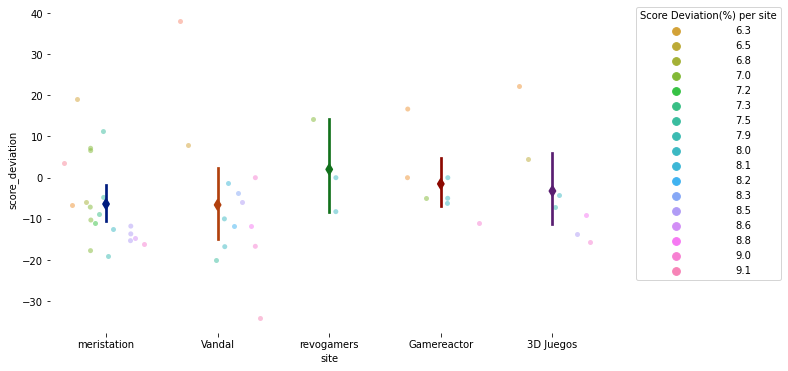

In [118]:
fig, ax = plt.subplots(figsize=(10,6))

sns.despine(bottom=True, left=True)
sns.pointplot(x="site", y="score_deviation", data=all_test_reduced, join=False, palette="dark", markers="d")

sns.stripplot(x="site", y="score_deviation", hue="score",
              data=all_test_reduced, dodge=True, alpha=.5, zorder=0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="Score Deviation(%) per site", handletextpad=5, frameon=True,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

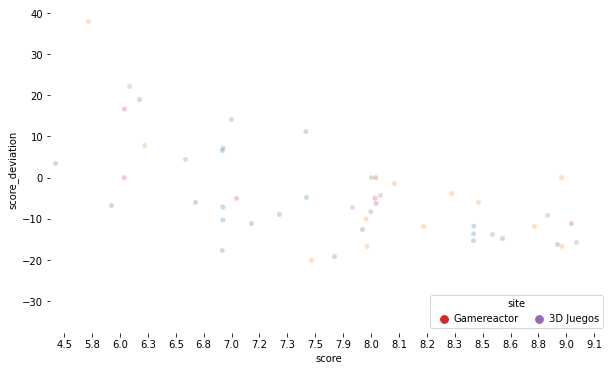

In [108]:
fig, ax = plt.subplots(figsize=(10,6))

sns.despine(bottom=True, left=True)
sns.stripplot(x="score", y="score_deviation", hue="site",
              data=all_test_reduced, dodge=True, alpha=.25, zorder=1)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="site",
          handletextpad=0, columnspacing=1,
          loc="lower right", ncol=3, frameon=True)
plt.show()

## 4. Streamlit Dashboard Code

In [ ]:
import streamlit as st

st.title('The Critics Critique App')
st.header('Introduction')
st.subheader('Steps')
st.text('This is an example')
st.latex('y = x²')
st.code('if a == 1:\n    print(a)', language='python')
st.markdown("This is **text** with markdown")